# Varieté en octave

## Polinomios cuadráticos de Lagrange

$$L_1 = \left( \frac{x-x_2}{x_1-x_2} \right)\left(\frac{x-x_3}{x_1-x_3} \right)$$

$$L_2 = \left( \frac{x-x_1}{x_2-x_1} \right)\left(\frac{x-x_3}{x_2-x_3} \right)$$

$$L_3 = \left( \frac{x-x_1}{x_3-x_1} \right)\left(\frac{x-x_2}{x_3-x_2} \right)$$

$$p_2(x) = y_1L_1(x) + y_2L_2(x) + y_3L_3(x)$$

In [22]:
function [L1, L2, L3] = lagr2(x, x1, x2, x3)
    L1 = (x-x2).*(x-x3)/((x1-x2)*(x1-x3));
    L2 = (x-x1).*(x-x3)/((x2-x1)*(x2-x3));
    L3 = (x-x1).*(x-x2)/((x3-x1)*(x3-x2));
end

In [73]:
xi = [0.1, 0.2, 0.3];
yi = tanh(xi);

x = 0:0.01:1;
f = tanh(x);

[L1, L2, L3] = lagr2(x, xi(1), xi(2), xi(3));

In [75]:
p2 = yi(1)*L1 + yi(2)*L2 + yi(3)*L3;

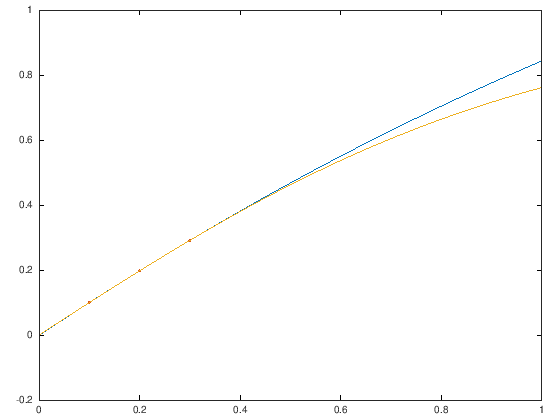

In [78]:
plot(x,p2)
hold on
scatter(xi,yi)
plot(x,f)

## Polinomios de Lagrange cuadráticos con soporte global

In [38]:
xd = [-2, -1, 0, 1, 2];
yd = [-0.96403,  -0.76159,   0.,   0.76159,   0.96403];
dx = 1/100;
n=length(xd);
xt = [];
p2 = [];

for i=1:2:n-1
    x1 = xd(i); x2 = xd(i+1); x3 = xd(i+2);
    y1 = yd(i); y2 = yd(i+1); y3 = yd(i+2);
    x = x1:dx:x3;
    [L1, L2, L3] = lagr2(x, x1, x2, x3);
    p2 = [p2, L1*y1 + L2*y2 + L3*y3];
    xt = [xt, x];
end

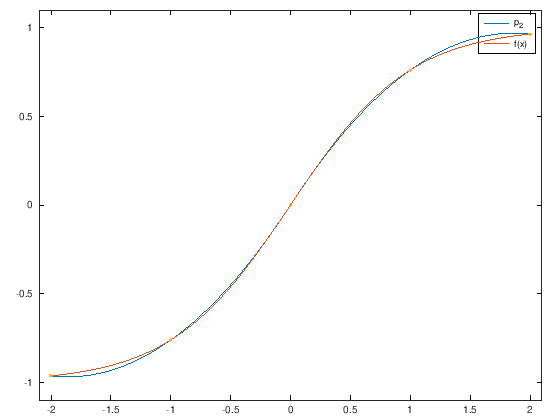

In [42]:
plot(xt,p2)
hold on
plot(xt, tanh(xt))
legend("p_2", "f(x)")
scatter(xd, yd)
axis([-2.1,2.1,-1.1,1.1])